In [2]:
# Create dictionary of interactions
def int_dict(jsondata):
    std = {} #the dictionary
    stay = 1 #counter for stays in buildings
    for i in jsondata: #loop over persons in json file
        if len(jsondata[i])>1: #tests if a given person i has more than one entry
            for j in jsondata[i]: #loops over the trips j of a given person i
                auxd = {} #auxiliar dictionary variable
                for k in j: #loops over entries in each trip and if statements are used to create new labels
                    if k=='source':
                        if j[k] == 'Home' or j[k] == 'Apartment':
                            auxd['class'] = 'residential'
                        else:
                            auxd['class'] = 'nonresidential'
                        auxd['subclass'] = j[k]
                    elif k =='sourceIndex':
                        auxd['building'] = j[k]
                    elif k =='destinationIndex':
                        pass
                    elif k =='destination':
                        pass
                    else:
                        auxd[k] = j[k]
                    auxd['person'] = i
                std[str(stay)] = auxd
                stay = stay+1
            auxd={}
            auxd['departureTime'] = 86400
            auxd['person'] = i
            auxd['arrivedAtSource'] = std[str(stay-1)]['arrivedAtSource']+8*60
            auxd['class'] = 'residential'
            auxd['subclass'] = jsondata[i][0]['source']
            auxd['building'] = jsondata[i][0]['sourceIndex']
            std[str(stay)] = auxd
        else: # if the length of the trip list is 1 that means that the person stayed at home so...
            auxd={}
            auxd['departureTime'] = 86400
            auxd['person'] = i
            auxd['arrivedAtSource'] = 0
            auxd['class'] = 'residential'
            auxd['subclass'] = jsondata[i][0]['source']
            auxd['building'] = jsondata[i][0]['sourceIndex']
            std[str(stay)] = auxd
        stay = stay+1
    return std

In [3]:
# Function that calculates half the contact matrix and symmetrices it
def contactmatrix(std):
    cmat = np.zeros((len(jsondata),len(jsondata)))
    for stay in std:
        for check in range(int(stay)+1,len(std)+1):
            sc = str(check)
            if std[sc]['person'] == std[stay]['person']:
                pass
            elif std[sc]['class'] == std[stay]['class'] and std[sc]['building'] == std[stay]['building']:
                spstay = [int(std[stay]['arrivedAtSource']),int(std[stay]['departureTime'])]
                scstay = [int(std[sc]['arrivedAtSource']),int(std[sc]['departureTime'])]
                stperson = int(std[stay]['person'])
                scperson = int(std[sc]['person'])
                if spstay[0] in range(scstay[0],scstay[1]+1):
                    if spstay[1] in range(scstay[0],scstay[1]+1):
                        cmat[stperson][scperson] = cmat[stperson][scperson]+spstay[1]-spstay[0]
                    else:
                        cmat[stperson][scperson] = cmat[stperson][scperson]+scstay[1]-spstay[0]
                elif spstay[1] in range(scstay[0],scstay[1]+1):
                    cmat[stperson][scperson] = cmat[stperson][scperson]+spstay[1]-scstay[0]

    for i in range(len(jsondata)):
        for j in range(0,i):
            cmat[i][j] = cmat[j][i]
    return cmat

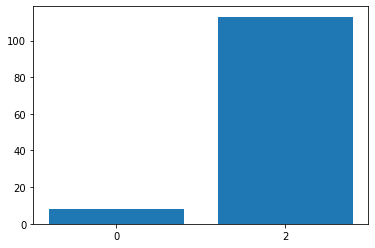

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Goal: Get a dictionary with buildings and people who have been there

# Opening schedule file
f = open('5Ben.json',)
  
# returns JSON object as a dictionary
jsondata = json.load(f)
jlen = len(jsondata)
# Closing file
f.close()

# Working with jsondata and its length: jsondata is a dictionary with a list of dicionaries
# Its format corresponds to jsondata['person'][trip number]['label']

#print('length of array:',len(jsondata['1']),'\n') #We can get the number of trips with the length of jsondata['i']
    # Check that the prevous comment is true
    
# Set up array for trip counter
agents = []
ntrips = []
for i in range(0,jlen):
    #print('agent number ', i)
    agents.append(i)
    #print('Number of trips:', len(jsondata['{}'.format(i)]))
    ntrips.append(len(jsondata[str(i)]))
    #print('\n')
    
for i in range(0,len(ntrips)):
    if ntrips[i] == 1:
        ntrips[i] = 0
        
unique, counts = np.unique(ntrips, return_counts=True)
Dtc = dict(zip(unique, counts))
plt.bar(range(len(Dtc)), list(Dtc.values()), align='center')
plt.xticks(range(len(Dtc)), list(Dtc.keys()))
plt.show()

In [8]:
std = int_dict(jsondata)
cmat = contactmatrix(std)
np.savetxt("cmat-Robert.csv", cmat, delimiter=",")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])